In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# we import all the libraries we need

In [3]:
!pip install opendatasets #we install the dataset from kaggle

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/gregorut/videogamesales") #i used this dataset and its about video games sales


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ghadaalshahrani
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gregorut/videogamesales


100%|██████████| 381k/381k [00:00<00:00, 457MB/s]

In [5]:
data=pd.read_csv("/content/videogamesales/vgsales.csv")

In [6]:
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
print("\nMissing values in each column:") #we start looking at the data we need to fix and clean!
print(data.isnull().sum())


Missing values in each column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [8]:
data.info() #more info about the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
data['Year'].fillna(data['Year'].mean(), inplace=True) #some columns have missing data like the year here

/tmp/ipython-input-630420091.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Year'].fillna(data['Year'].mean(), inplace=True) #some columns have missing data like the year here


In [10]:
data['Publisher'].fillna('Unknown', inplace=True) #and publisher here i fixed it and filled it with unknown

/tmp/ipython-input-84296913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Publisher'].fillna('Unknown', inplace=True) #and publisher here i fixed it and filled it with unknown


In [11]:
print("\nNumber of duplicate rows:")
print(data.duplicated().sum()) # i made sure there is no duplicates


Number of duplicate rows:
0


In [12]:
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [13]:
print("\nCleaned data:")
display(data)


Cleaned data:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [14]:
print("\nDescriptive statistics for numerical columns:")
display(data.describe()) #take a look at the Numerical Data


Descriptive statistics for numerical columns:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781197,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
print("\nValue counts for 'Publisher'")
print(data['Publisher'].value_counts())


Value counts for 'Publisher'
Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New World Computing                1
Genterprise                        1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64


In [16]:
print("\nAverage global sales for each platform:")
print(data.groupby('Platform')['Global_Sales'].mean())



Average global sales for each platform:
Platform
2600    0.729925
3DO     0.033333
3DS     0.486169
DC      0.307115
DS      0.380254
GB      2.606633
GBA     0.387470
GC      0.358561
GEN     1.050370
GG      0.040000
N64     0.686144
NES     2.561939
NG      0.120000
PC      0.269604
PCFX    0.030000
PS      0.610920
PS2     0.581046
PS3     0.720722
PS4     0.827679
PSP     0.244254
PSV     0.149952
SAT     0.194162
SCD     0.311667
SNES    0.837029
TG16    0.080000
WS      0.236667
Wii     0.699404
WiiU    0.572448
X360    0.774672
XB      0.313422
XOne    0.662254
Name: Global_Sales, dtype: float64


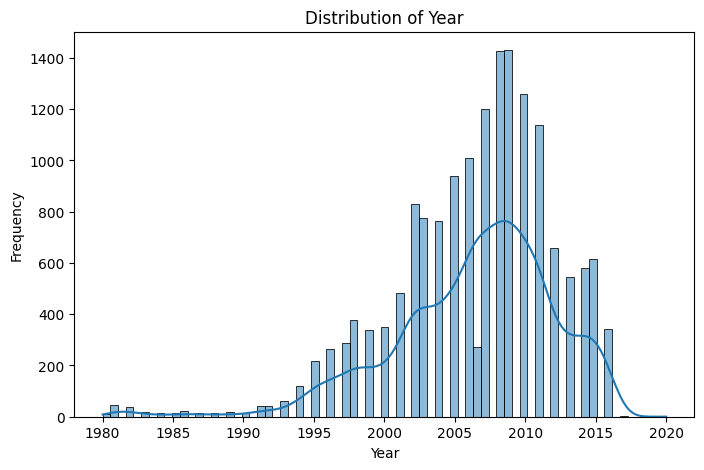

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Year'], kde=True)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

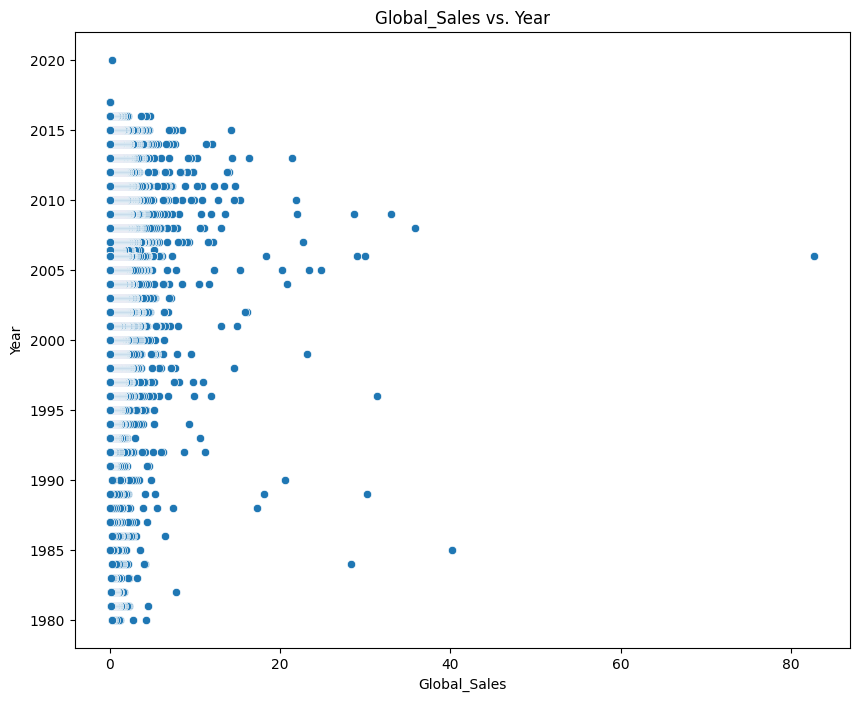

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Global_Sales', y='Year', data=data)
plt.title('Global_Sales vs. Year')
plt.xlabel('Global_Sales')
plt.ylabel('Year')
plt.show()

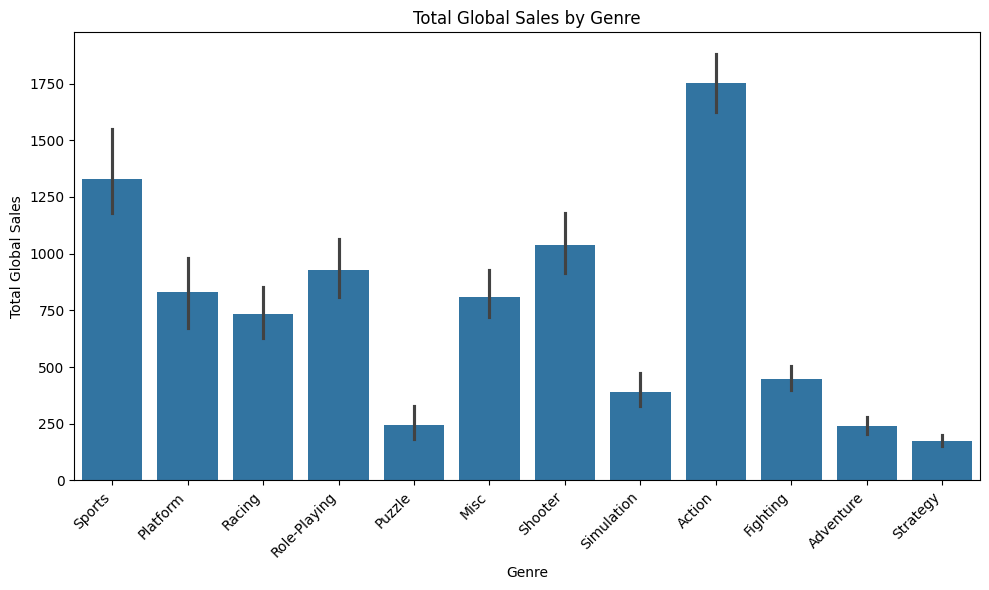

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Global_Sales', data=data, estimator=sum)
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()